In [1]:

# Importing necessary libraries for data analysis and visualization
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For static visualizations
import seaborn as sns  # For advanced visualizations
from wordcloud import WordCloud  # For generating word clouds
import warnings  # To handle warning messages
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output


C:\Users\khush\AppData\Local\Temp\ipykernel_22920\1200935156.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd  # For data manipulation and analysis


In [2]:

# Load the dataset
data = pd.read_csv('netflix1.csv')

# Display the first few rows of the dataset
print("Preview of the dataset:")
print(data.head())

# Check the shape of the dataset
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

# Display data types and non-null counts
print("\nDataset Information:")
print(data.info())


Preview of the dataset:
  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  

In [3]:

# Check for missing values in each column
print("Missing Values:")
print(data.isnull().sum())

# Drop duplicate rows to ensure unique records
data.drop_duplicates(inplace=True)

# Drop rows with missing values in critical columns: 'director' and 'country'
data.dropna(subset=['director', 'country'], inplace=True)

# Convert 'date_added' column to datetime format for proper time-series analysis
data['date_added'] = pd.to_datetime(data['date_added'])

# Confirm data types after cleaning
print("\nData types after cleaning:")
print(data.dtypes)


Missing Values:
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

Data types after cleaning:
show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


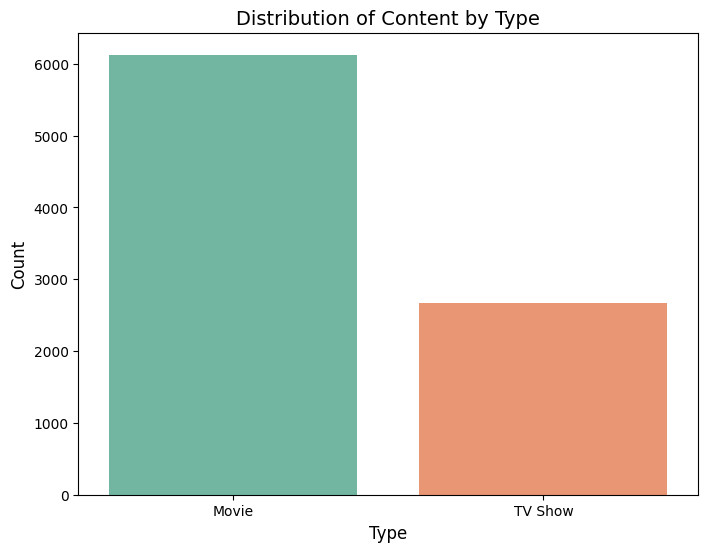

In [4]:

# Count the number of Movies and TV Shows
type_counts = data['type'].value_counts()

# Visualize the distribution of Movies and TV Shows
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Distribution of Content by Type', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


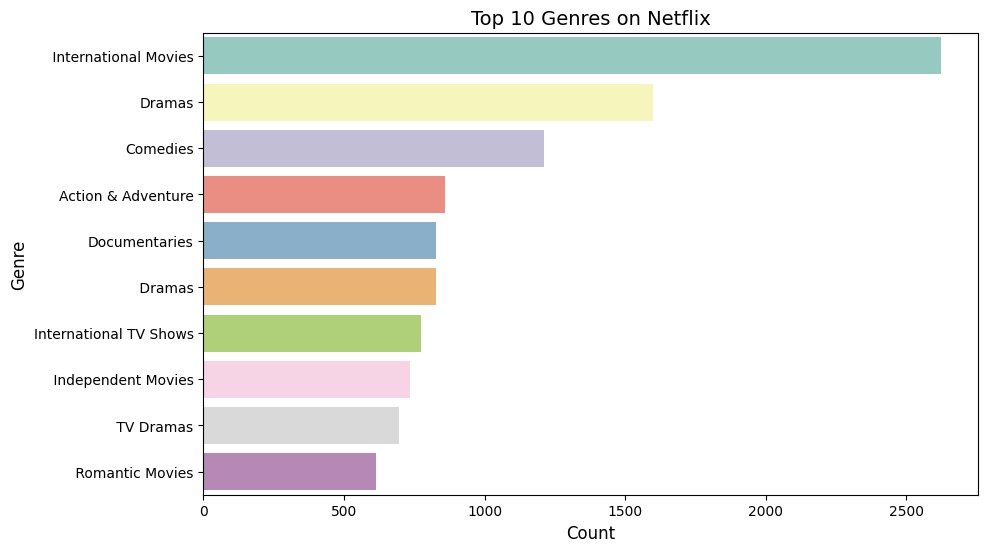

In [5]:

# Analyze the most common genres
data['genres'] = data['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts()

# Visualize the top 10 genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette='Set3')
plt.title('Top 10 Genres on Netflix', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()


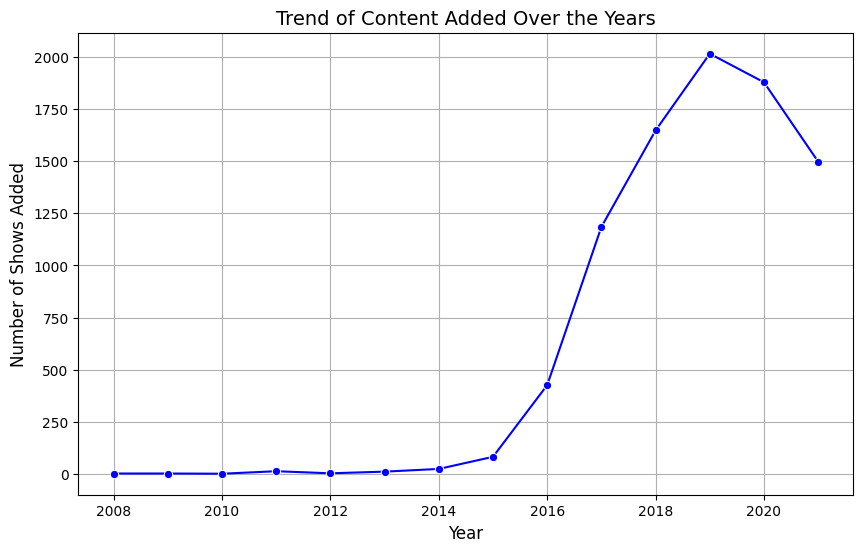

In [6]:

# Trend of content added over the years
data['year_added'] = data['date_added'].dt.year
content_trend = data['year_added'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=content_trend.index, y=content_trend.values, marker='o', color='b')
plt.title('Trend of Content Added Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Shows Added', fontsize=12)
plt.grid(True)
plt.show()


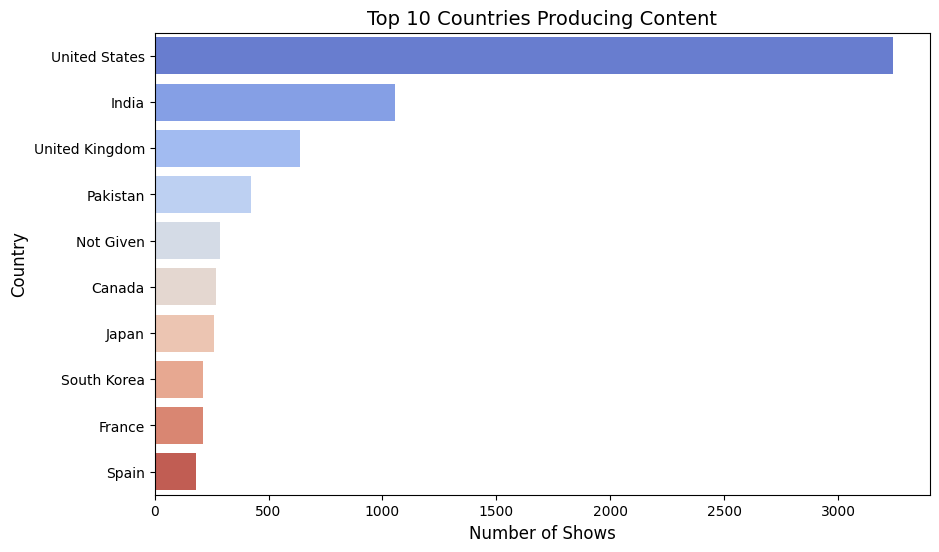

In [7]:

# Top countries producing content
top_countries = data['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries Producing Content', fontsize=14)
plt.xlabel('Number of Shows', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()


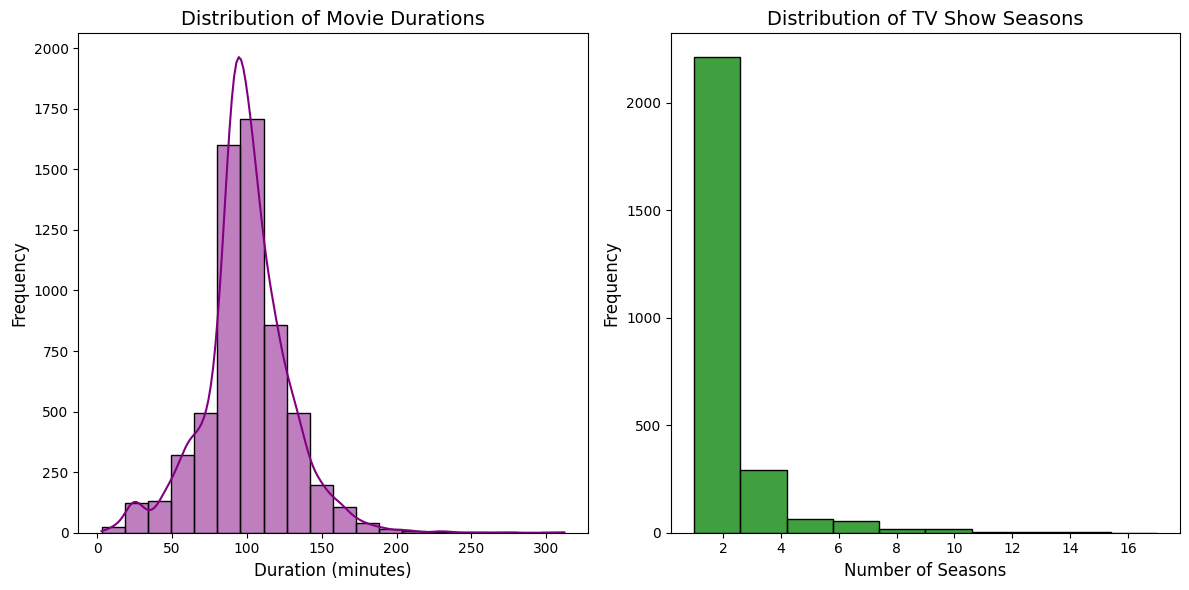

In [8]:

# Content duration analysis
movies = data[data['type'] == 'Movie']
tv_shows = data[data['type'] == 'TV Show']

# Extract numeric duration for movies
movies['duration_min'] = movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(12, 6))

# Plot movie durations
plt.subplot(1, 2, 1)
sns.histplot(movies['duration_min'], bins=20, kde=True, color='purple')
plt.title('Distribution of Movie Durations', fontsize=14)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Plot TV shows by number of seasons
tv_shows['seasons'] = tv_shows['duration'].str.replace(' Season', '').str.replace('s', '').astype(int)
plt.subplot(1, 2, 2)
sns.histplot(tv_shows['seasons'], bins=10, kde=False, color='green')
plt.title('Distribution of TV Show Seasons', fontsize=14)
plt.xlabel('Number of Seasons', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


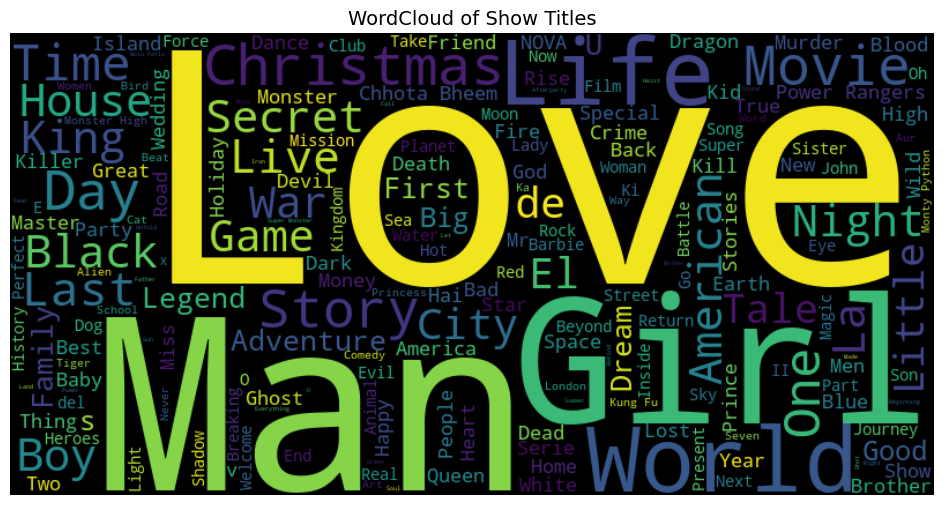

In [9]:

# WordCloud of show titles
title_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(data['title']))

plt.figure(figsize=(12, 6))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Show Titles', fontsize=14)
plt.show()


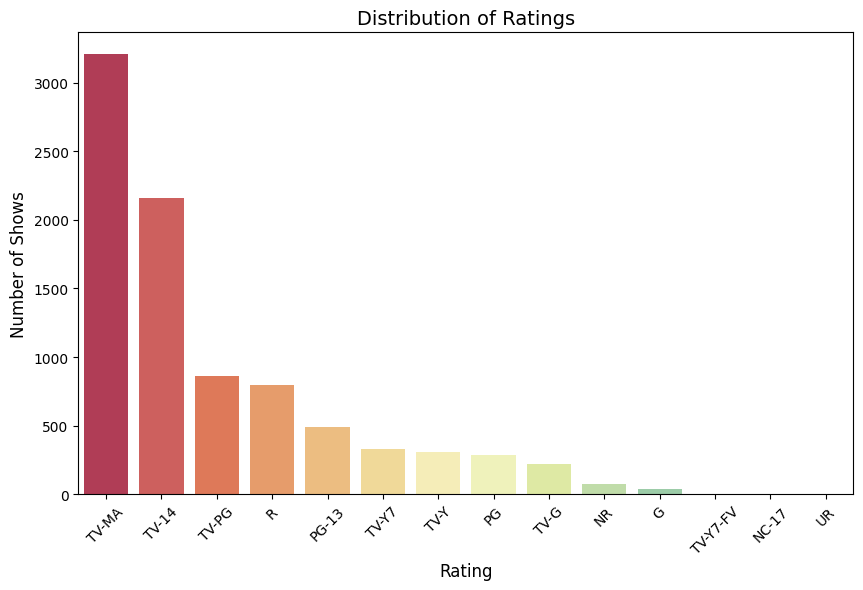

In [10]:

# Rating distribution
rating_counts = data['rating'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Spectral')
plt.title('Distribution of Ratings', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Shows', fontsize=12)
plt.xticks(rotation=45)
plt.show()
